In [2]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [3]:
data = pd.read_csv('corona_tested_006.csv')
data.head()

C:\Users\Rubina\AppData\Local\Temp\ipykernel_16816\2792723377.py:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('corona_tested_006.csv')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [4]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)


No of row =  278848
No of col =  11


In [5]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [9]:
print(data.isnull().sum())  
print((data == "").sum())  
print((data == "None").sum()) 

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64
Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64
Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64


In [15]:
data = data.replace('None', np.nan)  # Convert None to NaN
data = data.dropna()
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Abroad
13728,13729,22-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,No,female,Abroad
13730,13731,22-03-2020,TRUE,TRUE,FALSE,FALSE,FALSE,positive,Yes,female,Other
13731,13732,22-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,other,No,female,Other
13732,13733,22-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,other,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,14-04-2020,True,False,True,False,False,negative,Yes,male,Abroad
156036,156037,14-04-2020,True,False,True,True,False,negative,No,male,Abroad
156037,156038,14-04-2020,True,True,False,False,False,negative,No,female,Abroad
156038,156039,14-04-2020,False,False,False,False,False,negative,No,male,Other


In [16]:
data.shape

(138172, 11)

In [17]:
data['Cough_symptoms'] = data['Cough_symptoms'].astype('bool')
data['Fever'] = data['Fever'].astype('bool')
data['Sore_throat'] = data['Sore_throat'].astype('bool')
data['Shortness_of_breath'] = data['Shortness_of_breath'].astype('bool')
data['Headache'] = data['Headache'].astype('bool')

In [18]:
# data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138172 entries, 13727 to 156039
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               138172 non-null  int64 
 1   Test_date            138172 non-null  object
 2   Cough_symptoms       138172 non-null  bool  
 3   Fever                138172 non-null  bool  
 4   Sore_throat          138172 non-null  bool  
 5   Shortness_of_breath  138172 non-null  bool  
 6   Headache             138172 non-null  bool  
 7   Corona               138172 non-null  object
 8   Age_60_above         138172 non-null  object
 9   Sex                  138172 non-null  object
 10  Known_contact        138172 non-null  object
dtypes: bool(5), int64(1), object(5)
memory usage: 8.0+ MB


In [19]:
data['Corona'].value_counts()

negative    125668
positive     10626
other         1878
Name: Corona, dtype: int64

In [20]:
#Removing data which is not corona related
data = data[data['Corona'] != 'other']
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,True,True,True,True,True,negative,No,male,Abroad
13728,13729,22-03-2020,True,True,True,True,True,negative,No,female,Abroad
13730,13731,22-03-2020,True,True,True,True,True,positive,Yes,female,Other
13734,13735,22-03-2020,True,True,True,True,True,negative,No,male,Other
13735,13736,22-03-2020,True,True,True,True,True,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,14-04-2020,True,False,True,False,False,negative,Yes,male,Abroad
156036,156037,14-04-2020,True,False,True,True,False,negative,No,male,Abroad
156037,156038,14-04-2020,True,True,False,False,False,negative,No,female,Abroad
156038,156039,14-04-2020,False,False,False,False,False,negative,No,male,Other


In [21]:
df1 = data[data['Corona'] == 'positive']
df2 = data[data['Corona'] == 'negative'].iloc[0:10626]
data = pd.concat([df1,df2],axis = 0).sample(frac=1)

In [22]:
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
18351,18352,23-03-2020,True,True,True,True,True,positive,No,male,Abroad
17666,17667,23-03-2020,True,True,True,True,True,negative,No,male,Other
132120,132121,11-04-2020,False,False,False,False,False,positive,No,female,Contact with confirmed
37389,37390,26-03-2020,True,True,True,True,True,positive,No,female,Other
21659,21660,24-03-2020,True,True,True,True,True,negative,No,male,Other
...,...,...,...,...,...,...,...,...,...,...,...
109516,109517,06-04-2020,True,True,False,False,False,positive,No,female,Other
64910,64911,31-03-2020,True,True,True,True,True,positive,Yes,female,Contact with confirmed
22144,22145,24-03-2020,True,True,True,True,True,negative,No,male,Other
127035,127036,10-04-2020,True,True,False,False,False,positive,No,male,Other


In [23]:
data = data.iloc[:,2:]

In [24]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
18351,True,True,True,True,True,positive,No,male,Abroad
17666,True,True,True,True,True,negative,No,male,Other
132120,False,False,False,False,False,positive,No,female,Contact with confirmed
37389,True,True,True,True,True,positive,No,female,Other
21659,True,True,True,True,True,negative,No,male,Other
...,...,...,...,...,...,...,...,...,...
109516,True,True,False,False,False,positive,No,female,Other
64910,True,True,True,True,True,positive,Yes,female,Contact with confirmed
22144,True,True,True,True,True,negative,No,male,Other
127035,True,True,False,False,False,positive,No,male,Other


In [25]:
# ord_enc is ordinal encoding which donot add additional column like get dummies does. It changes the values in existing column
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

data["Age_60_above"] = ord_enc.fit_transform(data[["Age_60_above"]]).astype('int')
data["Sex"] = ord_enc.fit_transform(data[["Sex"]]).astype('int')
data["Known_contact"] = ord_enc.fit_transform(data[["Known_contact"]]).astype('int')
data["Corona"] = ord_enc.fit_transform(data[["Corona"]]).astype('int')

In [26]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
18351,True,True,True,True,True,1,0,1,0
17666,True,True,True,True,True,0,0,1,2
132120,False,False,False,False,False,1,0,0,1
37389,True,True,True,True,True,1,0,0,2
21659,True,True,True,True,True,0,0,1,2
...,...,...,...,...,...,...,...,...,...
109516,True,True,False,False,False,1,0,0,2
64910,True,True,True,True,True,1,1,0,1
22144,True,True,True,True,True,0,0,1,2
127035,True,True,False,False,False,1,0,1,2


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21252 entries, 18351 to 21600
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Cough_symptoms       21252 non-null  bool 
 1   Fever                21252 non-null  bool 
 2   Sore_throat          21252 non-null  bool 
 3   Shortness_of_breath  21252 non-null  bool 
 4   Headache             21252 non-null  bool 
 5   Corona               21252 non-null  int32
 6   Age_60_above         21252 non-null  int32
 7   Sex                  21252 non-null  int32
 8   Known_contact        21252 non-null  int32
dtypes: bool(5), int32(4)
memory usage: 601.9 KB


In [28]:
data.shape

(21252, 9)

In [29]:
data.corr()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Cough_symptoms,1.000000,0.749763,0.317890,0.315275,0.324355,-0.192055,-0.031100,0.005856,0.016329
Fever,0.749763,1.000000,0.357563,0.355762,0.371775,-0.216079,-0.017148,0.002715,0.048133
Sore_throat,0.317890,0.357563,1.000000,0.895460,0.873315,-0.583798,-0.044411,-0.053942,0.099184
Shortness_of_breath,0.315275,0.355762,0.895460,1.000000,0.871759,-0.600397,-0.027924,-0.043704,0.106855
Headache,0.324355,0.371775,0.873315,0.871759,1.000000,-0.564236,-0.051335,-0.046918,0.096389
Corona,-0.192055,-0.216079,-0.583798,-0.600397,-0.564236,1.000000,0.060173,0.096052,-0.299333
Age_60_above,-0.031100,-0.017148,-0.044411,-0.027924,-0.051335,0.060173,1.000000,0.000672,0.042194
Sex,0.005856,0.002715,-0.053942,-0.043704,-0.046918,0.096052,0.000672,1.000000,-0.004837
Known_contact,0.016329,0.048133,0.099184,0.106855,0.096389,-0.299333,0.042194,-0.004837,1.000000


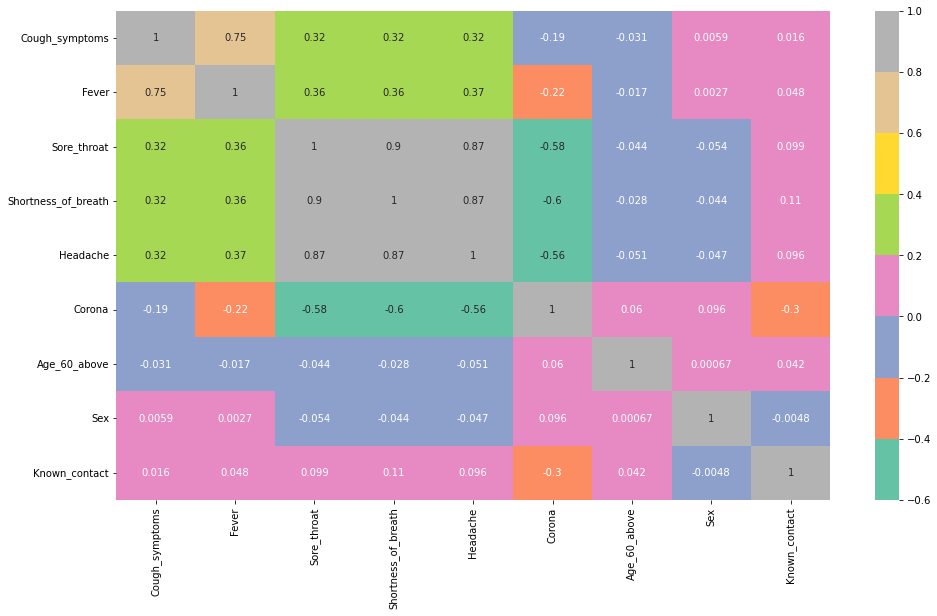

In [30]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()


In [31]:
data.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact'],
      dtype='object')

In [32]:
# training and normalization of data
X = data[['Cough_symptoms', 'Fever','Sore_throat', 'Shortness_of_breath', 'Headache', 'Known_contact']]
Y = data['Corona']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

In [33]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)

SVC()

In [34]:
# Creating pickle file
import pickle
with open('Covid_Classification.pickle', 'wb') as f:
    pickle.dump(svc, f)

In [35]:
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Known_contact
16904,True,True,True,True,True,2
21550,True,True,True,True,True,2
49910,True,True,True,True,True,2
73631,True,True,False,False,False,1
119331,True,True,False,False,False,2
...,...,...,...,...,...,...
64003,True,True,True,True,True,2
32911,True,True,True,True,True,2
36926,True,True,True,True,True,0
20390,True,True,True,True,True,2


In [36]:
Y_pred = svc.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
Y_test

16904     0
21550     0
49910     1
73631     1
119331    1
         ..
64003     1
32911     1
36926     1
20390     0
14849     0
Name: Corona, Length: 4251, dtype: int32

In [38]:
#test aucc
svc_accuracy= round(accuracy_score(Y_test,Y_pred)*100,2) # Accuracy
svc_accuracy

88.0

In [39]:
#train aucc
Y_train_pred = svc.predict(X_train)
svc_accuracy= round(accuracy_score(Y_train,Y_train_pred), 2)*100 # Accuracy
svc_accuracy

89.0

In [ ]:
#Cough_symptoms Fever Sore_throat Shortness_of_breath Headache Known_contact
Cough_symptoms = int(input("Cough_symptoms: Enter 1 for True 0 for False = "))
Fever = float(input("Fever: Enter 1 for True 0 for False = "))
Sore_throat = float(input("Sore_throat: Enter 1 for True 0 for False = "))
Shortness_of_breath = float(input("Shortness_of_breath: Enter 1 for True 0 for False = "))
Headache = float(input("Headache: Enter 1 for True 0 for False = "))
Known_contact = float(input("Known_contact: Enter 0 for Abroad 1 for Contact with confirmed 2 for Other = "))


new_data = {'Cough_symptoms':[Cough_symptoms],
            'Fever':[Fever],
            'Sore_throat':[Sore_throat],
            'Shortness_of_breath':[Shortness_of_breath],
            'Headache':[Headache],
            'Known_contact':[Known_contact]}
d = pd.DataFrame(new_data)

In [ ]:
Y_score = svc.predict(d)
if Y_score[0] == 1:
    print("Positive")
else:
    print("Negative")

In [31]:
d = X_test.iloc[0:1]
d

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Known_contact
63135,True,True,True,True,True,1


In [32]:
Y_score = svc.predict(d)
print(Y_score)

[1]


In [33]:
Y_pred = svc.predict(X_test)
Y_pred

array([1, 0, 1, ..., 1, 1, 1])

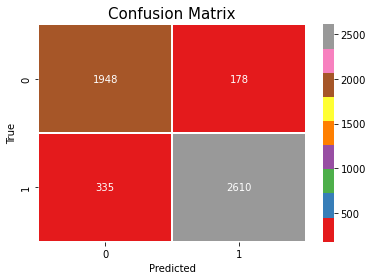

In [34]:
cm=confusion_matrix(Y_test,Y_pred)

class_label = [0, 1]

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [35]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[1948,  178],
       [ 335, 2610]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
ytest = np.array(Y_test)
print(classification_report(ytest,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2126
           1       0.94      0.89      0.91      2945

    accuracy                           0.90      5071
   macro avg       0.89      0.90      0.90      5071
weighted avg       0.90      0.90      0.90      5071



In [42]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train,Y_train)
Y_pred = log_regression.predict(X_test)

lg_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
lg_accuracy

89.88000000000001

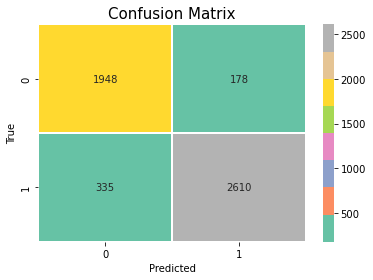

In [43]:
cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
